## Encoding

### 1. Importamos las librerías necesarias.

In [33]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Codificación de las variables numéricas
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Fijar medida y color de las gráficas
plt.rcParams["figure.figsize"] = (10,6)
#sns.set_palette('PuBuGn', 9) ---> revisar

### 2. Abrimos el archivo estandarizado, para ejecutar la codificación.

In [34]:
df = pd.read_csv("../archivos/bikes_stand.csv", index_col = 0)
df.head(2)

,fecha,estacion,año,mes,dia_semana,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
0,2018-01-01,invierno,0,1,lunes,New Year's Day,-0.486274,0.855582,-0.208909,331,654,985
1,2018-01-02,invierno,0,1,martes,No Festivo,-0.425690,0.332722,0.687550,131,670,801


### 3. Orden e importancia de las variables que queremos codificar.

- fecha: tenemos la información de los días en otras columnas más específicas, por lo que no vamos a utilizarla para la predicción.

- mes: no tiene mucha correlación con nuestra variable repuesta, y encima tenemos esa información mejor categorizada en la variable estación.


- estación: tiene orden ---> verano:3, primavera:2, otoño:1, invierno:0

- año: tiene orden ---> 2018:0 y 2019:1

- dia_semana: no tiene orden

- dias_festivos: tiene orden --- > festivos:1 , no festivos:0 (si que hay más alquiler de bicicletas en días festivos y entre los días festivos hay diferencias).

### Variable estaciones

In [35]:
df_estaciones = pd.DataFrame(df.groupby(df['estacion'])['total_bicis'].sum())

In [36]:
df_estaciones.reset_index(inplace=True)

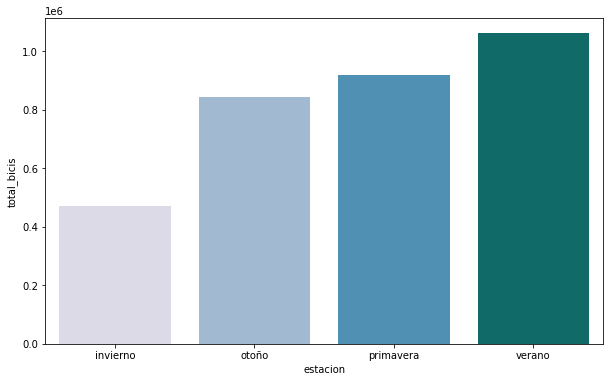

In [37]:
sns.barplot(y= 'total_bicis', x= 'estacion', data= df_estaciones, palette='PuBuGn');

### Variable año

In [38]:
df_año = pd.DataFrame(df.groupby(df['año'])['total_bicis'].sum())

In [39]:
df_año.reset_index(inplace=True)

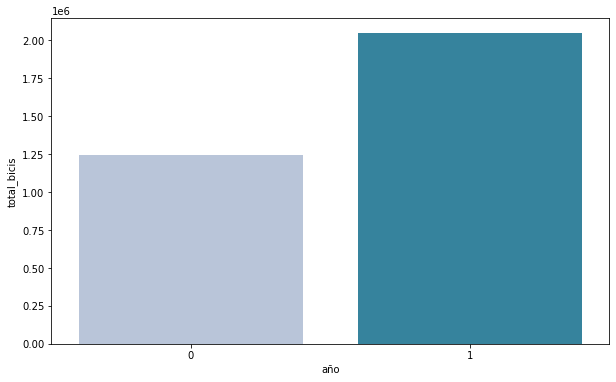

In [40]:
sns.barplot(y= 'total_bicis', x= 'año', data= df_año, palette='PuBuGn');

Hay más alquiler de bicicletas en el año 2019, por ahora dejamos el encoding de la misma manera--> 2018:0 y 2019:1 

### Variable mes

In [41]:
df_mes = pd.DataFrame(df.groupby(df['mes'])['total_bicis'].sum())

In [42]:
df_mes.reset_index(inplace=True)

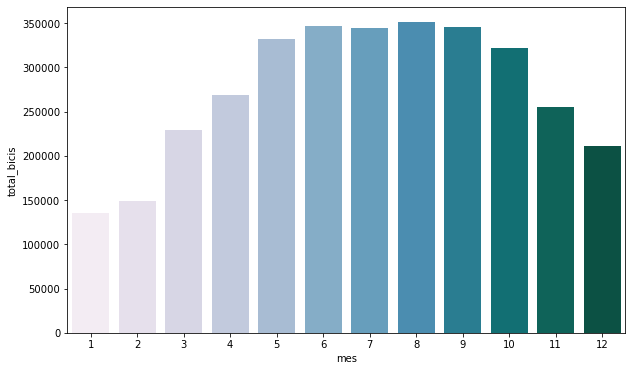

In [43]:
sns.barplot(y= 'total_bicis', x= 'mes', data= df_mes, palette='PuBuGn');

Se observan patrones similares a la variable estaciones, habiendo más alquileres de bicicletas desde mayo hasta octubre.

### Variable días

In [44]:
df_dias = pd.DataFrame(df.groupby(df['dia_semana'])['total_bicis'].sum())

In [45]:
df_dias.reset_index(inplace=True)

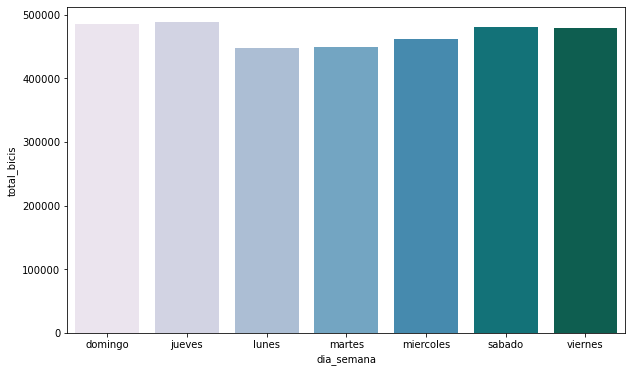

In [46]:
sns.barplot(y= 'total_bicis', x= 'dia_semana', data= df_dias, palette = 'PuBuGn');

No se observa que haya días más importantes que otros por lo que no tendría orden a la hora del encoding

### 4. Encoding de variables que no tienen orden.

In [47]:
lista_columnas = ["dia_semana",'mes']

df_encoded = pd.DataFrame()


for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [48]:
df_encoded.head(2)

,dia_semana_domingo,dia_semana_jueves,dia_semana_lunes,dia_semana_martes,dia_semana_miercoles,dia_semana_sabado,dia_semana_viernes,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df_codificado = pd.concat([df, df_encoded], axis=1)

### 5. Encoding de variables con orden.

In [50]:
# Definimos los mapas de las variables que queremos codificar

mapa_estacion= {"verano":6, "primavera":4, "otoño":1, "invierno":0}

mapa_dias_festivos= {"New Year's Day": 1, 
                    'Martin Luther King Jr. Day': 1,
                    "Washington's Birthday": 1, 
                    'Memorial Day': 1, 
                    'Independence Day': 1,
                    'Labor Day': 1, 
                    'Columbus Day': 1, 
                    'Veterans Day': 1,
                    'Veterans Day (Observed)': 1, 
                    'Thanksgiving': 1, 
                    'Christmas Day': 1, 
                    'No Festivo': 0}

In [51]:
df_codificado['estacion'] = df_codificado['estacion'].map(mapa_estacion)
df_codificado['dias_festivos'] = df_codificado['dias_festivos'].map(mapa_dias_festivos)

#### 6. Eliminamos las columnas que no vamos a utilizar.

In [52]:
df_codificado.drop(['año','fecha', 'mes', 'dia_semana'], axis=1, inplace=True)

In [53]:
df_codificado.head()

,estacion,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana_domingo,dia_semana_jueves,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,0,1,-0.486274,0.855582,-0.208909,331,654,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-0.425690,0.332722,0.687550,131,670,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-0.949970,-0.900337,0.685210,120,1229,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.938563,-0.170632,-0.210435,108,1454,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-0.853992,-0.901843,0.060294,82,1518,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_codificado.to_csv('../archivos/est_cod_bikes.csv')

7. Hacemos la versión sólo de codificada, abriendo el archivo sin estandarizar.

In [55]:
df1 = pd.read_csv("../archivos/bikes_eda.csv", index_col = 0)
df1.head(2)

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes


In [56]:
lista_columnas = ["dia_semana"]

df1_encoded = pd.DataFrame()


for columna in lista_columnas:
    df1_dummies = pd.get_dummies(df1[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df1_encoded = pd.concat([df1_encoded, df1_dummies], axis = 1)

In [57]:
df1_encoded.head(2)

,dia_semana_domingo,dia_semana_jueves,dia_semana_lunes,dia_semana_martes,dia_semana_miercoles,dia_semana_sabado,dia_semana_viernes
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0


In [58]:
df1_codificado = pd.concat([df1, df1_encoded], axis=1)

In [59]:
df1_codificado['estacion'] = df1_codificado['estacion'].map(mapa_estacion)
df1_codificado['dias_festivos'] = df1_codificado['dias_festivos'].map(mapa_dias_festivos)

In [60]:
df1_codificado.drop(['fecha', 'año', 'mes', 'dia_semana'], axis=1, inplace=True)

In [61]:
df1_codificado.head()

,estacion,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana_domingo,dia_semana_jueves,dia_semana_lunes,dia_semana_martes,dia_semana_miercoles,dia_semana_sabado,dia_semana_viernes
0,0,1,14.110847,80.5833,10.749882,331,654,985,0,0,1,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0
2,0,0,8.050924,43.7273,16.636703,120,1229,1349,0,0,0,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,108,1454,1562,0,1,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,1


In [62]:
df_codificado.to_csv('../archivos/cod_bikes.csv')